# CS345 Assignment 5
For this assignment I will be looking at the phishing website data from (https://archive.ics.uci.edu/ml/datasets/Website+Phishing). This is a classification problem to solve whether of not a website has phishing software on it or if the results are non-conculsive.  

## The Data
In the Data folderPhishingData.arff cointains our information. 

There are 10 attributes:  
* SFH: {1, -1, 0}
* popUpWindow: {1, -1, 0}
* SSLfinal_State: {1, -1, 0}
* Request_URL: {1, -1, 0}
* web_traffic: {1, -1, 0}
* URL_Lenght: {1, -1, 0}
* age_of_domain: {1, -1}
* having_IP_Address: {1, 0}
* Result: {1, -1, 0}

And 1353 instances.

## The Methods
For analysing this dataset I will compare decision tree and random forest classifiers to eachother, and then I will look at logistic regression.

### Setting Up

In [ ]:
from google.colab import drive
from scipy.io import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier


from sklearn.linear_model import LogisticRegression

### Loading The Data

In [ ]:
drive.mount('/content/drive')
filename_fish = 'drive/MyDrive/Colab Notebooks/Assignments/Assignment_05/Data/PhishingData.arff'
data_fish, meta_fish = arff.loadarff(filename_fish)
arr_fish = np.array(data_fish)
df = pd.DataFrame(data = arr_fish, columns = meta_fish.names()) 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Make Data Pretty

In [ ]:
# for some reason the values are read in as byte literals
# this is the only way I knew how to fix it
df_fish = df.copy(deep=True)

col = np.array(list(df_fish.columns.values)[:10])

for i in col:
  for j in range(len(df_fish[i][:])):
    if df_fish[i][j] == b'-1':
      df_fish[i][j] = -1.0
    elif df_fish[i][j] == b'0':
      df_fish[i][j] = 0.0
    elif df_fish[i][j] == b'1':
      df_fish[i][j] = 1.0

display(df_fish.head())

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [ ]:
label_name = 'Result'

feature_names = list(df_fish.columns.values)[:9]
X = list(df_fish[feature_names].values)
y = list(df_fish[label_name].values)

print(f'X has a size of {np.shape(X)}, and Y has a size of {np.shape(y)}')

X has a size of (1353, 9), and Y has a size of (1353,)


## Split Data Into Training and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.30, shuffle=True, random_state=42)

# Model 1
### Random Forest compared to Decison Tree
I thought it would be cool to compare random forest and decision trees, because they are so similar, but can have very different outcomes.

Before I created a random forest classifier I wanted to make a decision tree so I could compare how the results turned out!  

#### Part 1: Decision Tree

Mean accuracy is  0.894


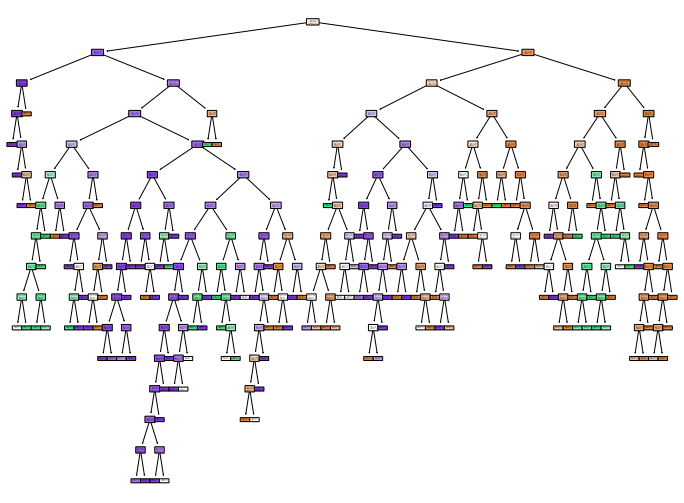

In [ ]:
tree = DecisionTreeClassifier(max_depth=100)
tree.fit(X_train, y_train) # training

plt.figure(figsize=(12,9))
plot_tree(tree, filled=True, rounded=True);

acc = tree.score(X_test, y_test) #testing
print(f'Mean accuracy is {acc:6.3f}')

#### Part 2: Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=5, max_depth=100)
rf.fit(X_train, y_train)

acc = rf.score(X_test, y_test)
print(f'Mean accuracy is {acc:6.3f}')

Mean accuracy is  0.872


### Analysis
This is really interesting to see! A single decision tree has a accuracy of 89.4%, but a random forest with 5 trees is degraded at 87.2%.  
If I were to guess this is becuase the random forest is over fitted to the training data.  

# Model 2
## Logistic Regression
I know I was only supposed to use two models, but after looking at decision tree and random forest I was interested in actually looking at the predictor variables. So I decided to use logistic regression!

In [ ]:
liblin = LogisticRegression(solver='liblinear')
liblin.fit(X_train, y_train)
acc = liblin.score(X_test, y_test)
print(f'Mean accuracy is {acc:6.3f}')

Mean accuracy is  0.835


#### Analysis
This accuracy rate was a bit dissapointing I was expecting something better after looking at decision tree.


In [ ]:
show_rows = 9
coef_order = np.argsort(-1.0*np.abs(liblin.coef_))

for i in coef_order[0][0:show_rows]:
  co = liblin.coef_[0,i]
  print(f'Coef {co:6.3f} for features {i:3d} = {feature_names[i]}')

Coef  1.607 for features   0 = SFH
Coef  1.566 for features   1 = popUpWidnow
Coef  1.128 for features   2 = SSLfinal_State
Coef  0.884 for features   3 = Request_URL
Coef  0.380 for features   4 = URL_of_Anchor
Coef -0.378 for features   8 = having_IP_Address
Coef -0.269 for features   6 = URL_Length
Coef  0.253 for features   7 = age_of_domain
Coef -0.084 for features   5 = web_traffic


## Analysis of Logistic Regression

I found looking at the logistic regression interesting, because theres not a single variable that has a strong predicting value on phishing. SFH, popUpWindow, and Request_URL have the highest effect at greater than 1.  

I am also curious if the fact that my outcome variable had more that two values it could take on affected the accuracy.  

# Overall Conclusion
When it comes to the phishing dataset, the decision tree and random forest classifier nearly worked equally well. They were about to predict website phishing with an accuracy rate of arount 88%.  

Logisitic Regression had a similar accuracy at 83%. I believe that the accuracy for this model was lower than that on the decision tree and random forest, because none of the predicting variables had very much predicting power. 

Overall, all three of these classifier models did a relativly good job at classifying this data!